In [ ]:
# Import package that we need
import os
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
# Import raw data into colab
!git clone https://github.com/ridhomujizat/AksaraSundaCNN/

Cloning into 'AksaraSundaCNN'...
remote: Enumerating objects: 5780, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 5780 (delta 3), reused 0 (delta 0), pack-reused 5767
Receiving objects: 100% (5780/5780), 145.21 MiB | 33.62 MiB/s, done.
Resolving deltas: 100% (299/299), done.
Checking out files: 100% (11371/11371), done.


In [ ]:
# Import raw data into colab
!git clone https://github.com/ridhomujizat/AksaraSundaCNN/

fatal: destination path 'AksaraSundaCNN' already exists and is not an empty directory.


In [ ]:
# Define root directory (blm dipake)
root_path = '/content/AksaraSundaCNN'

root_path_train = os.path.join(root_path, 'train')
root_path_test = os.path.join(root_path, 'test')

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 10,
                                     width_shift_range = 0.04,
                                     height_shift_range = 0.04,
                                     shear_range = 0.04,
                                     zoom_range = 0.04,
                                     fill_mode = 'nearest')

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(root_path_train, root_path_test)

Found 3780 images belonging to 18 classes.
Found 1620 images belonging to 18 classes.


In [ ]:
model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1024, activation ='relu'),
      tf.keras.layers.Dense(18, activation='softmax')
  ])

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# Train your model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
76/76 [==============================] - 28s 361ms/step - loss: 2.8920 - accuracy: 0.0471 - val_loss: 2.8901 - val_accuracy: 0.0556
Epoch 2/30
76/76 [==============================] - 27s 363ms/step - loss: 2.2634 - accuracy: 0.2548 - val_loss: 1.0518 - val_accuracy: 0.6006
Epoch 3/30
76/76 [==============================] - 27s 360ms/step - loss: 0.7184 - accuracy: 0.7407 - val_loss: 0.3114 - val_accuracy: 0.8815
Epoch 4/30
76/76 [==============================] - 27s 360ms/step - loss: 0.3650 - accuracy: 0.8653 - val_loss: 0.2309 - val_accuracy: 0.9130
Epoch 5/30
76/76 [==============================] - 27s 360ms/step - loss: 0.2893 - accuracy: 0.9034 - val_loss: 0.2174 - val_accuracy: 0.9191
Epoch 6/30
76/76 [==============================] - 28s 374ms/step - loss: 0.1410 - accuracy: 0.9534 - val_loss: 0.0958 - val_accuracy: 0.9660
Epoch 7/30
76/76 [==============================] - 27s 359ms/step - loss: 0.1103 - accuracy: 0.9640 - val_loss: 0.0790 - val_accuracy: 0.9704

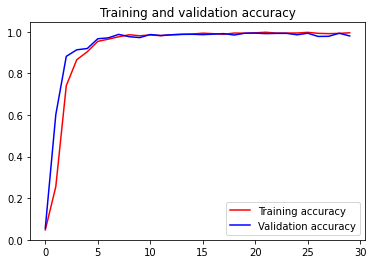

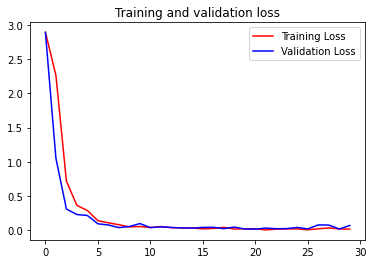

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('Aksara_Sunda_Classification.h5',save_format=".h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('Aksara_Sunda.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpg4h7uv2z/assets


6498492